## Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Loading the Dataset

In [7]:
data = pd.read_csv("multiple_linear_regression.csv")

In [11]:
data.head(10)

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Handling null values

In [20]:
data.dropna()
data.shape

(200, 4)

## Splitting The Data

In [23]:
output_col = "Target"

In [31]:
x = data.iloc[:, data.columns != output_col]

In [33]:
y = data.loc[:, output_col]

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 40)

In [39]:
x_train

,Feature 1,Feature 2,Feature 3
188,286.0,13.9,3.7
170,50.0,11.6,18.4
107,90.4,0.3,23.2
65,69.0,9.3,0.9
109,255.4,26.9,5.5
...,...,...,...
50,199.8,3.1,34.6
184,253.8,21.3,30.0
165,234.5,3.4,84.8
7,120.2,19.6,11.6


In [41]:
y_train

188    15.9
170     8.4
107     8.7
65      9.3
109    19.8
       ... 
50     11.4
184    17.6
165    11.9
7      13.2
70     18.3
Name: Target, Length: 140, dtype: float64

# <font color = "green">Multiple Linear Regression</font>

In [45]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
lr.coef_

array([ 0.04374167,  0.19818858, -0.00520108])

In [49]:
lr.intercept_

3.2231085134881106

## Predicting Test Input

In [56]:
predicted_value = lr.predict(x_test)

In [58]:
from sklearn.metrics import mean_squared_error

cost = mean_squared_error(y_test, predicted_value)

In [61]:
cost

4.27553286012287

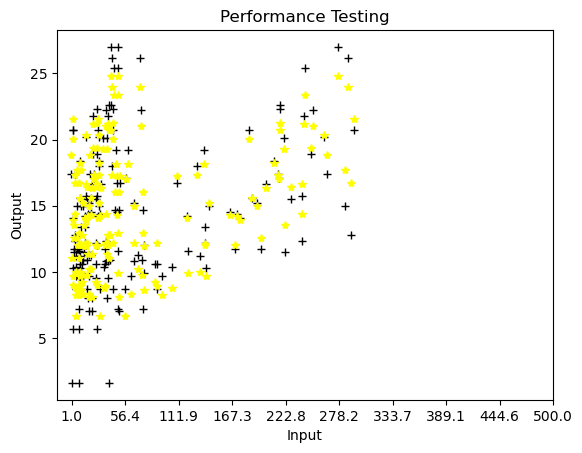

In [71]:
plt.plot(x_test, y_test, "+", color = "black")
plt.plot(x_test, predicted_value, "*", color = "yellow")
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Output")
plt.xticks(np.linspace(1,500,10))
plt.show()